# Aga Patro - lab 1

## Zadanie 1. Implementacje algorytmów

### 1.1 Algorytm naiwny

In [155]:
def naive_string_matching(text, pattern):
    result = 0
    
    for s in range(len(text) - len(pattern) + 1):
        if pattern == text[s : s + len(pattern)]:
            result += 1

    return result

In [156]:
naive_string_matching(text="agaaagagaa", pattern="aga")

3

### 1.2 Automay skończony

In [157]:
def transition(pattern):
    splitted = list(pattern)
    characters = set(pattern)
    
    result = []
    for q in range(len(pattern) + 1):
        result.append({})
        for a in characters:
            k = min(len(pattern), q+1)
            suffix = pattern[:q] + a
            while pattern[:k] != "" and pattern[:k] != suffix[q - k + 1:]:
                k -= 1
            result[q][a] = k
    return result

def finite_automaton_string_matching(text, delta):
    q = 0
    result = []

    for s in range(0, len(text)):
        if text[s] in delta[q]:
            q = delta[q][text[s]]
            if q == len(delta) - 1:
                result.append(s + 1 - q)
        else:
            q = 0
    
    return len(result)

In [158]:
finite_automaton_string_matching(text="agaaagagaa", delta=transition("aga"))

3

### 1.3 Algorytm Knuth-Morris-Pratt'a

In [159]:
def prefix_function(pattern):
    lps = [0] * len(pattern)
    l = 0
    i = 1

    while i < len(pattern):
        while l > 0 and pattern[i] != pattern[l]:
            l -= 1
        
        if pattern[i] == pattern[l]:
            l += 1
            
        lps[i] = l
        i += 1
    
    return lps

def kmp_string_matching(text, pattern, lps):
    result = []
    i = 0
    j = 0

    while i < len(text):
        if text[i] != pattern[j]:
            if j > 0:
                j = lps[j-1]
            else:
                i += 1
        else:
            i, j = i+1, j+1
            if j == len(pattern):
                result.append(i-j)
                j = lps[j-1]
    
    return len(result)


In [160]:
kmp_string_matching(text="agaaagagaa", pattern="aga", lps=prefix_function("aga"))

3

## Zadanie 2. Pomiar czasu 

### 2.1 Funkcje mierzące czas wykonywania poszczególnych algorytmów

In [161]:
from timeit import default_timer as timer

def naive_measure_time(text, pattern):
    start = timer()
    result = naive_string_matching(text, pattern)
    end = timer()

    return end-start

def fa_measure_time(text, pattern):
    start = timer()
    delta = transition(pattern)
    processed = timer()
    result = finite_automaton_string_matching(text, delta)
    end = timer()

    return processed-start, end-processed, end-start

def kmp_measure_time(text, pattern):
    start = timer()
    pi = prefix_function(pattern)
    processed = timer()
    result = kmp_string_matching(text, pattern, pi)
    end = timer()

    return processed-start, end-processed, end-start
    
    

## Zadanie 3. Znalezienie wzorców "pan" oraz "pani" w załączonym pliku dla każdego z algorytmów

### 3.1 "pan"

In [162]:
file = open("pan-tadeusz.txt")
text = file.read().replace("\n", " ")
pattern = "pan"

print(f"Algorytm naiwny znalazł: {naive_string_matching(text, pattern)} dopasowań")
print(f"Skończony automat znalazł: {finite_automaton_string_matching(text, transition(pattern))} dopasowań")
print(f"Algorytm KMP znalazł: {kmp_string_matching(text, pattern, prefix_function(pattern))} dopasowań")

Algorytm naiwny znalazł: 401 dopasowań
Skończony automat znalazł: 401 dopasowań
Algorytm KMP znalazł: 401 dopasowań


### 3.2 "pani"

In [163]:
file = open("pan-tadeusz.txt")
text = file.read().replace("\n", " ")
pattern = "pani"

print(f"Algorytm naiwny znalazł: {naive_string_matching(text, pattern)} dopasowań")
print(f"Skończony automat znalazł: {finite_automaton_string_matching(text, transition(pattern))} dopasowań")
print(f"Algorytm KMP znalazł: {kmp_string_matching(text, pattern, prefix_function(pattern))} dopasowań")

Algorytm naiwny znalazł: 100 dopasowań
Skończony automat znalazł: 100 dopasowań
Algorytm KMP znalazł: 100 dopasowań


Jak widać zarówno dla wzorca "pan" jak i "pani, wszytskie 3 algorytmy znajdują taką samą ilość dopasowań.

## Zadanie 4. Porównanie czasów

### 4.1 Funkcje potrzebne do kilkukrotnego mierzenia czasu

In [164]:
import math


def count_time_native(test_num, text, pattern):
    min_time = math.inf
    max_time = -math.inf
    average_time = 0

    for i in range(test_num):
        time = naive_measure_time(text, pattern)
        min_time = min(min_time, time)
        max_time = max(max_time, time)
        average_time += time

    return min_time, max_time, average_time/test_num


def count_time_fa(test_num, text, pattern):
    min_time = math.inf
    max_time = -math.inf
    average_time = 0
    pro_min_time = math.inf
    pro_max_time = -math.inf
    pro_average_time = 0
    find_min_time = math.inf
    find_max_time = -math.inf
    find_average_time = 0

    for i in range(test_num):
        process_time, finding_time, time = fa_measure_time(text, pattern)
        min_time = min(min_time, time)
        max_time = max(max_time, time)
        average_time += time
        pro_min_time = min(pro_min_time, process_time)
        pro_max_time = max(pro_max_time, process_time)
        pro_average_time += process_time
        find_min_time = min(find_min_time, finding_time)
        find_max_time = max(find_max_time, finding_time)
        find_average_time += finding_time

    return min_time, max_time, average_time/test_num, pro_min_time, pro_max_time, pro_average_time/test_num, find_min_time, find_max_time, find_average_time/test_num


def count_time_kmp(test_num, text, pattern):
    min_time = math.inf
    max_time = -math.inf
    average_time = 0
    pro_min_time = math.inf
    pro_max_time = -math.inf
    pro_average_time = 0
    find_min_time = math.inf
    find_max_time = -math.inf
    find_average_time = 0

    for i in range(test_num):
        process_time, finding_time, time = kmp_measure_time(text, pattern)
        min_time = min(min_time, time)
        max_time = max(max_time, time)
        average_time += time
        pro_min_time = min(pro_min_time, process_time)
        pro_max_time = max(pro_max_time, process_time)
        pro_average_time += process_time
        find_min_time = min(find_min_time, finding_time)
        find_max_time = max(find_max_time, finding_time)
        find_average_time += finding_time

    return min_time, max_time, average_time/test_num, pro_min_time, pro_max_time, pro_average_time/test_num, find_min_time, find_max_time, find_average_time/test_num

### 4.2 Wyniki pomiarów

#### Pomiar całkowitego czasu wykonywania - "pan"

  Algorytm  Max czas  Min czas  Średni czas
0   Naiwny  0.000006  0.000003     0.000003
1       FA  0.000019  0.000012     0.000014
2      KMP  0.000009  0.000005     0.000006


/tmp/ipykernel_6005/299407393.py:23: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in for_plot.groupby(['Algorytm']):


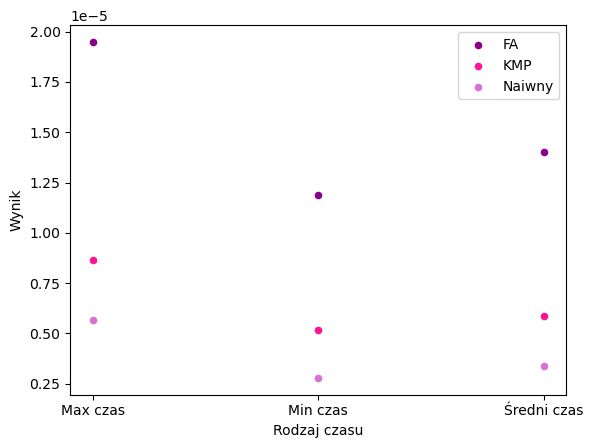

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

text = "pan-tadeusz.txt"
pattern = "pan"

naive = count_time_native(6, text, pattern)
fa = count_time_fa(6, text, pattern)
kmp = count_time_kmp(6, text, pattern)

table = pd.DataFrame({'Algorytm' : ["Naiwny", "FA", "KMP"],
              'Max czas' : [naive[1], fa[1], kmp[1]],
              'Min czas': [naive[0], fa[0], kmp[0]],
              'Średni czas' : [naive[2], fa[2], kmp[2]]})


colors = {'Naiwny' : 'orchid', 'FA' : 'darkmagenta', 'KMP' : 'deeppink'}
for_plot = pd.DataFrame({'Algorytm' : ["Naiwny", "Naiwny", "Naiwny", "FA", "FA", "FA", "KMP", "KMP", "KMP"],
                         'Rodzaj czasu' : ['Max czas', 'Min czas', 'Średni czas', 'Max czas', 'Min czas', 'Średni czas', 'Max czas', 'Min czas', 'Średni czas'],
                         'Wynik' : [naive[1], naive[0], naive[2], fa[1], fa[0], fa[2], kmp[1], kmp[0], kmp[2]]})

fig, ax = plt.subplots()
for key, grp in for_plot.groupby(['Algorytm']):
    ax = grp.plot(ax=ax, kind='scatter', x='Rodzaj czasu', y='Wynik', label=key, color=colors[key])
    
plt.show
print(table)

#### Pomiar całkowitego czasu wykonywania - "pani"

/tmp/ipykernel_6005/1412765242.py:21: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in for_plot.groupby(['Algorytm']):


  Algorytm  Max czas  Min czas  Średni czas
0   Naiwny  0.000005  0.000002     0.000003
1       FA  0.000027  0.000020     0.000022
2      KMP  0.000008  0.000005     0.000006


<function matplotlib.pyplot.show(close=None, block=None)>

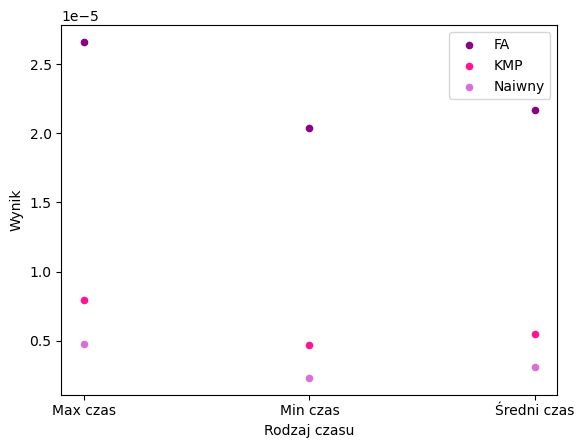

In [166]:
text = "pan-tadeusz.txt"
pattern = "pani"

naive = count_time_native(6, text, pattern)
fa = count_time_fa(6, text, pattern)
kmp = count_time_kmp(6, text, pattern)

table = pd.DataFrame({'Algorytm' : ["Naiwny", "FA", "KMP"],
              'Max czas' : [naive[1], fa[1], kmp[1]],
              'Min czas': [naive[0], fa[0], kmp[0]],
              'Średni czas' : [naive[2], fa[2], kmp[2]]})

print(table)

colors = {'Naiwny' : 'orchid', 'FA' : 'darkmagenta', 'KMP' : 'deeppink'}
for_plot = pd.DataFrame({'Algorytm' : ["Naiwny", "Naiwny", "Naiwny", "FA", "FA", "FA", "KMP", "KMP", "KMP"],
                         'Rodzaj czasu' : ['Max czas', 'Min czas', 'Średni czas', 'Max czas', 'Min czas', 'Średni czas', 'Max czas', 'Min czas', 'Średni czas'],
                         'Wynik' : [naive[1], naive[0], naive[2], fa[1], fa[0], fa[2], kmp[1], kmp[0], kmp[2]]})

fig, ax = plt.subplots()
for key, grp in for_plot.groupby(['Algorytm']):
    ax = grp.plot(ax=ax, kind='scatter', x='Rodzaj czasu', y='Wynik', label=key, color=colors[key])
plt.show

Dla pomiarów całkowitego czasu, dla obu wzrorców, algorytm naiwny wypada najlepiej, natomiast najgorzej wypada automat skończony.

#### Pomiar czasu pre-processingu dla FA oraz KMP - "pan"

  Algorytm  Max czas  Min czas  Średni czas
0       FA  0.000017  0.000009     0.000011
1      KMP  0.000004  0.000001     0.000002


/tmp/ipykernel_6005/1695916552.py:20: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in for_plot.groupby(['Algorytm']):


<function matplotlib.pyplot.show(close=None, block=None)>

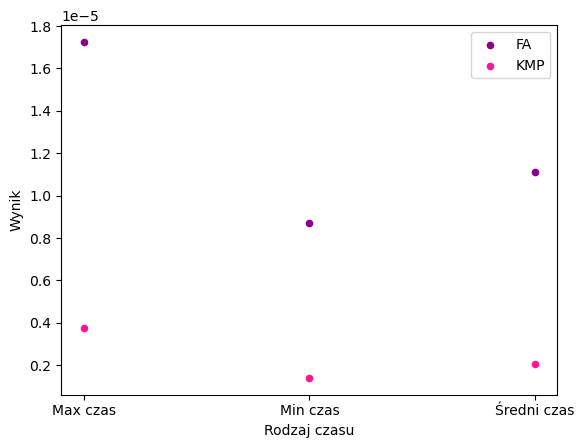

In [167]:
text = "pan-tadeusz.txt"
pattern = "pan"

fa = count_time_fa(6, text, pattern)
kmp = count_time_kmp(6, text, pattern)

table = pd.DataFrame({'Algorytm' : ["FA", "KMP"],
              'Max czas' : [fa[4], kmp[4]],
              'Min czas': [fa[3], kmp[3]],
              'Średni czas' : [fa[5], kmp[5]]})

print(table)

colors = {'FA' : 'darkmagenta', 'KMP' : 'deeppink'}
for_plot = pd.DataFrame({'Algorytm' : ["FA", "FA", "FA", "KMP", "KMP", "KMP"],
                         'Rodzaj czasu' : ['Max czas', 'Min czas', 'Średni czas', 'Max czas', 'Min czas', 'Średni czas'],
                         'Wynik' : [fa[4], fa[3], fa[5], kmp[4], kmp[3], kmp[5]]})

fig, ax = plt.subplots()
for key, grp in for_plot.groupby(['Algorytm']):
    ax = grp.plot(ax=ax, kind='scatter', x='Rodzaj czasu', y='Wynik', label=key, color=colors[key])
plt.show

#### Pomiar czasu pre-processingu dla FA oraz KMP - "pani"

  Algorytm  Max czas  Min czas  Średni czas
0       FA  0.000035  0.000017     0.000020
1      KMP  0.000004  0.000001     0.000002


/tmp/ipykernel_6005/1317676157.py:20: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in for_plot.groupby(['Algorytm']):


<function matplotlib.pyplot.show(close=None, block=None)>

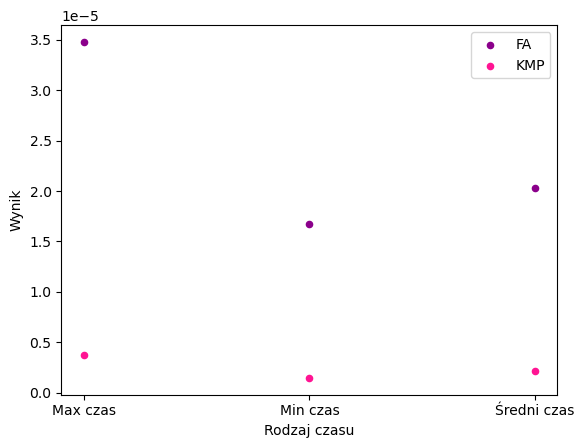

In [168]:
text = "pan-tadeusz.txt"
pattern = "pani"

fa = count_time_fa(6, text, pattern)
kmp = count_time_kmp(6, text, pattern)

table = pd.DataFrame({'Algorytm' : ["FA", "KMP"],
              'Max czas' : [fa[4], kmp[4]],
              'Min czas': [fa[3], kmp[3]],
              'Średni czas' : [fa[5], kmp[5]]})

print(table)

colors = {'FA' : 'darkmagenta', 'KMP' : 'deeppink'}
for_plot = pd.DataFrame({'Algorytm' : ["FA", "FA", "FA", "KMP", "KMP", "KMP"],
                         'Rodzaj czasu' : ['Max czas', 'Min czas', 'Średni czas', 'Max czas', 'Min czas', 'Średni czas'],
                         'Wynik' : [fa[4], fa[3], fa[5], kmp[4], kmp[3], kmp[5]]})

fig, ax = plt.subplots()
for key, grp in for_plot.groupby(['Algorytm']):
    ax = grp.plot(ax=ax, kind='scatter', x='Rodzaj czasu', y='Wynik', label=key, color=colors[key])
plt.show

Dla pre-processingu algorytm KPM wypada lepiej

#### Pomiar czasu dopasowania dla FA oraz KMP - "pan"

  Algorytm  Max czas  Min czas  Średni czas
0       FA  0.000005  0.000003     0.000003
1      KMP  0.000005  0.000003     0.000004


/tmp/ipykernel_6005/339527131.py:20: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in for_plot.groupby(['Algorytm']):


<function matplotlib.pyplot.show(close=None, block=None)>

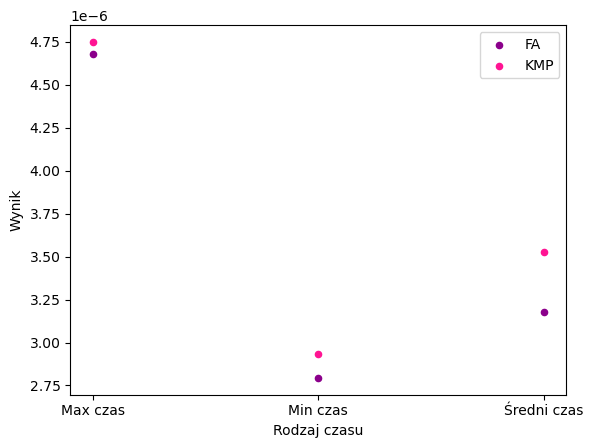

In [169]:
text = "pan-tadeusz.txt"
pattern = "pan"

fa = count_time_fa(6, text, pattern)
kmp = count_time_kmp(6, text, pattern)

table = pd.DataFrame({'Algorytm' : ["FA", "KMP"],
              'Max czas' : [fa[7], kmp[7]],
              'Min czas': [fa[6], kmp[6]],
              'Średni czas' : [fa[8], kmp[8]]})

print(table)

colors = {'FA' : 'darkmagenta', 'KMP' : 'deeppink'}
for_plot = pd.DataFrame({'Algorytm' : ["FA", "FA", "FA", "KMP", "KMP", "KMP"],
                         'Rodzaj czasu' : ['Max czas', 'Min czas', 'Średni czas', 'Max czas', 'Min czas', 'Średni czas'],
                         'Wynik' : [fa[7], fa[6], fa[8], kmp[7], kmp[6], kmp[8]]})

fig, ax = plt.subplots()
for key, grp in for_plot.groupby(['Algorytm']):
    ax = grp.plot(ax=ax, kind='scatter', x='Rodzaj czasu', y='Wynik', label=key, color=colors[key])
plt.show

#### Pomiar czasu dopasowania dla FA oraz KMP - "pani"

  Algorytm  Max czas  Min czas  Średni czas
0       FA  0.000004  0.000001     0.000003
1      KMP  0.000004  0.000002     0.000003


/tmp/ipykernel_6005/522207879.py:20: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in for_plot.groupby(['Algorytm']):


<function matplotlib.pyplot.show(close=None, block=None)>

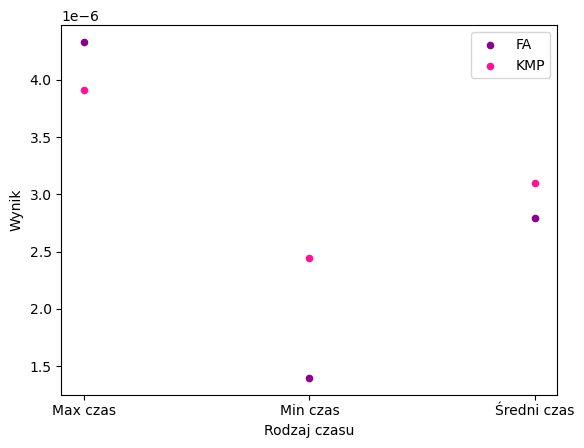

In [170]:
text = "pan-tadeusz.txt"
pattern = "pani"

fa = count_time_fa(6, text, pattern)
kmp = count_time_kmp(6, text, pattern)

table = pd.DataFrame({'Algorytm' : ["FA", "KMP"],
              'Max czas' : [fa[7], kmp[7]],
              'Min czas': [fa[6], kmp[6]],
              'Średni czas' : [fa[8], kmp[8]]})

print(table)

colors = {'FA' : 'darkmagenta', 'KMP' : 'deeppink'}
for_plot = pd.DataFrame({'Algorytm' : ["FA", "FA", "FA", "KMP", "KMP", "KMP"],
                         'Rodzaj czasu' : ['Max czas', 'Min czas', 'Średni czas', 'Max czas', 'Min czas', 'Średni czas'],
                         'Wynik' : [fa[7], fa[6], fa[8], kmp[7], kmp[6], kmp[8]]})

fig, ax = plt.subplots()
for key, grp in for_plot.groupby(['Algorytm']):
    ax = grp.plot(ax=ax, kind='scatter', x='Rodzaj czasu', y='Wynik', label=key, color=colors[key])
plt.show

Dla dopasowywania po processingu automat skończony wypada lepiej

## Zadanie 5. Propozycja innego wzorca

In [171]:
text = 'hsjieibsdhcvsahjbuebfvhadbflvihadbfnlvhdbfihvbadfhjvbldikhvdfvdfbrfbdxbgldxhfdblkjsdjasb'
pattern = "x"*213700

naive = naive_measure_time(text, pattern)
fa = fa_measure_time(text, pattern)
kmp = kmp_measure_time(text, pattern)

print("==== Algorytm naiwny ====")
print(f"Czas działania: {naive}\n")
print("==== Automat skończony ====")
print(f"Czas działania: {fa[1]}\n")
print("==== Algorytm KMP ====")
print(f"Czas działania: {kmp[1]}\n")

==== Algorytm naiwny ====
Czas działania: 3.840999852400273e-06

==== Automat skończony ====
Czas działania: 1.676199826761149e-05

==== Algorytm KMP ====
Czas działania: 1.9066999811911955e-05



## Zadanie 6. Wnioski

Z jakiegoś nieznanego mi powodu, algorytm naiwny wypada lepiej niż pozostałe algorytmy, więc trudno postawić mi jakiekolwiek wnioski, podświadomie wiedząc, że powinien on wypaść najgorzej :(